In [36]:
%matplotlib inline

In [37]:
import numpy as np
import pandas as pd
import os
from scipy.stats import zscore
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
import matplotlib.pyplot as plt

In [38]:
path0 = '/Users/Apple/Downloads/Clustering_Supporting_Files/'
RCDF = pd.read_csv(path0+"Cust_Spend_Data.csv")

In [39]:
RCDF

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3
5,6,F,4000,3,0,1,8
6,7,G,2500,5,0,11,2
7,8,H,2500,3,0,1,1
8,9,I,2000,2,0,2,2
9,10,J,1000,4,0,1,7


In [40]:
RCDF_new = RCDF.iloc[:,2:]

In [41]:
RCDF_new

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,10000,2,1,1,0
1,7000,3,0,10,9
2,7000,7,1,3,4
3,6500,5,1,1,4
4,6000,6,0,12,3
5,4000,3,0,1,8
6,2500,5,0,11,2
7,2500,3,0,1,1
8,2000,2,0,2,2
9,1000,4,0,1,7


In [42]:
RCDF_new.apply(zscore)

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1.886498,-1.240347,1.527525,-0.741433,-1.380131
1,0.787567,-0.620174,-0.654654,1.280656,1.725164
2,0.787567,1.860521,1.527525,-0.292080,0.000000
3,0.604412,0.620174,1.527525,-0.741433,0.000000
4,0.421257,1.240347,-0.654654,1.730009,-0.345033
5,-0.311364,-0.620174,-0.654654,-0.741433,1.380131
6,-0.860829,0.620174,-0.654654,1.505333,-0.690066
7,-0.860829,-0.620174,-0.654654,-0.741433,-1.035098
8,-1.043984,-1.240347,-0.654654,-0.516756,-0.690066
9,-1.410294,0.000000,-0.654654,-0.741433,1.035098


In [43]:
# pdist, help(pdist)
# Compute the distance
d_euc = pdist(RCDF.iloc[:,2:7], metric = 'euclidean')

In [44]:
# Build the Clusters
clus1 = linkage(d_euc, method = 'average')

Text(0.5, 0.98, 'Cluster Dendrogram')

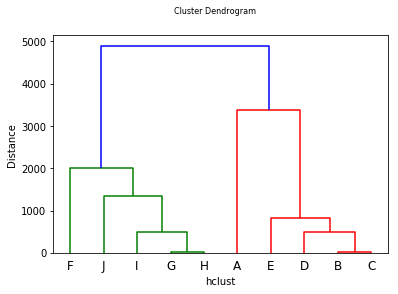

In [52]:
# Display the Clusters in Dendogram
dendrogram(clus1, labels=RCDF["Name"].values.tolist())
plt.xlabel('hclust')
plt.ylabel('Distance')
plt.suptitle('Cluster Dendrogram', fontsize = 8)

In [34]:


print(np.round(squareform(d_euc).tolist(),3))

[[   0.    3000.027 3000.007 3500.004 4000.018 6000.005 7500.008 7500.
  8000.    9000.003]
 [3000.027    0.       9.539  500.111 1000.024 3000.014 4500.006 4500.016
  5000.011 6000.007]
 [3000.007    9.539    0.     500.008 1000.042 3000.006 4500.008 4500.003
  5000.003 6000.002]
 [3500.004  500.111  500.008    0.     500.124 2500.004 4000.013 4000.002
  4500.002 5500.001]
 [4000.018 1000.024 1000.042  500.124    0.    2000.039 3500.    3500.019
  4000.015 5000.014]
 [6000.005 3000.014 3000.006 2500.004 2000.039    0.    1500.047 1500.016
  2000.009 3000.   ]
 [7500.008 4500.006 4500.008 4000.013 3500.    1500.047    0.      10.247
   500.09  1500.042]
 [7500.    4500.016 4500.003 4000.002 3500.019 1500.016   10.247    0.
   500.003 1500.012]
 [8000.    5000.011 5000.003 4500.002 4000.015 2000.009  500.09   500.003
     0.    1000.015]
 [9000.003 6000.007 6000.002 5500.001 5000.014 3000.    1500.042 1500.012
  1000.015    0.   ]]
